In [39]:
# This program is based on the Udemy course "Python for Finance: Investment Fundamentals & Data Analytics" 
# by Martin and Ned from 365
# Link to the course: https://www.udemy.com/course/python-for-finance-investment-fundamentals-data-analytics/
# This is a jupyter notebook file, better to run in jupyter notebook enviorment.
# Author: Martin and Ned, 365 Team. 
# Updated by: Kuo L. 2022-02-15
# Use this script to compare expected performance with actual performance with 3 year increments.

import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
%matplotlib inline

In [53]:
# It uses yahoo finance api to get close price for each ticker stock/ETF.
# use any 3 tickers, I just use vanguard ETFs.
# you can put more than 3 tickers, just note that the more tickers in, 
# the more calculation needed to plot efficient frontier. change num_simulation to a higher number as needed.

# num_simulation = 3000
assets = ['AAPL', 'SHLX', 'VYM','VHT','VIG', 'VGT', 'AY','HASI','CWEN','F','NIO','VUG','COST','EVC','GOOGL','METV','VOO','MSFT','RBLX']
money_invested = [6842,2041,7816,244,1611,414,162,82,330,534,125,855,5144,696,2743,889,12294,4503,1494]
if len(assets) == len(money_invested):
    pf_data = pd.DataFrame()
    weights = money_invested
    weights /= np.sum(weights)

    for a in assets:
        #you can chagne the start date to any date in 'yyyy-mm-dd' format and end = 'yyyy-mm-dd'.
        pf_data[a] = wb.DataReader(a, data_source = 'yahoo', start = '2019-1-1')['Adj Close'] 
else:
    raise Exception

In [54]:
# pf_data.head() #makre sure companies were public at starting date

In [42]:
# pf_data.tail() #check companies still open and public at ending date

<AxesSubplot:xlabel='Date'>

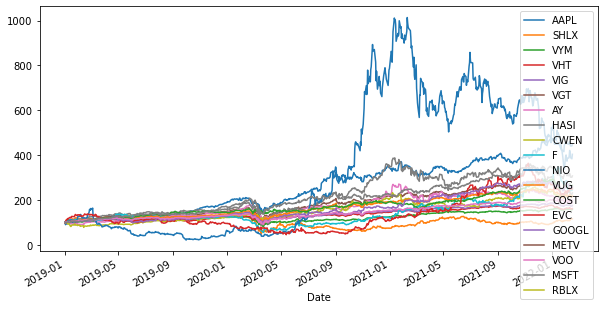

In [55]:
(pf_data / pf_data.iloc[0] * 100).plot(figsize=(10, 5)) #Plot of company performance without considering dividends

In [56]:
log_returns = np.log(pf_data / pf_data.shift(1)) #get average daily log returns

In [57]:
indi_return = log_returns.mean() * 250 #get yearly returns(daily return x # of days a year). Market open roughly 250 days a year, so I do not use 365. 

In [58]:
log_returns.cov() * 250 #get coveriance between each pair.

,AAPL,SHLX,VYM,VHT,VIG,VGT,AY,HASI,CWEN,F,NIO,VUG,COST,EVC,GOOGL,METV,VOO,MSFT,RBLX
AAPL,0.114781,0.055486,0.045573,0.047130,0.048971,0.081995,0.044784,0.073003,0.042079,0.050590,0.077678,0.070114,0.042961,0.025323,0.067961,0.038877,0.059503,0.079525,0.041003
SHLX,0.055486,0.247173,0.059473,0.042795,0.048795,0.056687,0.074187,0.092742,0.062978,0.085688,0.060914,0.052674,0.017612,0.068796,0.055221,0.018338,0.057811,0.050644,0.022585
VYM,0.045573,0.059473,0.047077,0.037850,0.042676,0.046365,0.041004,0.055668,0.040744,0.059147,0.036472,0.042007,0.026383,0.042537,0.040746,0.013200,0.045380,0.044066,0.002159
VHT,0.047130,0.042795,0.037850,0.043145,0.038023,0.047325,0.039377,0.052383,0.037629,0.040484,0.037987,0.043139,0.027306,0.024678,0.041633,0.020873,0.041444,0.047650,0.019641
VIG,0.048971,0.048795,0.042676,0.038023,0.042318,0.049231,0.039951,0.055546,0.039249,0.050796,0.035450,0.044582,0.029947,0.033538,0.043012,0.019890,0.044641,0.048971,0.014850
VGT,0.081995,0.056687,0.046365,0.047325,0.049231,0.076465,0.050691,0.075292,0.046298,0.053652,0.076131,0.066425,0.039481,0.034577,0.065084,0.050804,0.057677,0.076607,0.066285
AY,0.044784,0.074187,0.041004,0.039377,0.039951,0.050691,0.128070,0.093068,0.082949,0.054726,0.063745,0.047692,0.025354,0.039697,0.041441,0.040893,0.045428,0.049399,0.074585
HASI,0.073003,0.092742,0.055668,0.052383,0.055546,0.075292,0.093068,0.205543,0.079115,0.087786,0.121288,0.069849,0.036765,0.082883,0.060329,0.071530,0.063919,0.067368,0.091551
CWEN,0.042079,0.062978,0.040744,0.037629,0.039249,0.046298,0.082949,0.079115,0.127664,0.046820,0.052608,0.042840,0.028581,0.046253,0.036840,0.028500,0.042437,0.043779,0.040486
F,0.050590,0.085688,0.059147,0.040484,0.050796,0.053652,0.054726,0.087786,0.046820,0.191607,0.081469,0.049338,0.023166,0.087200,0.044356,0.034563,0.056019,0.042579,0.033727


In [59]:
log_returns.corr() #get correlation between each pair.

,AAPL,SHLX,VYM,VHT,VIG,VGT,AY,HASI,CWEN,F,NIO,VUG,COST,EVC,GOOGL,METV,VOO,MSFT,RBLX
AAPL,1.000000,0.329420,0.619969,0.669728,0.702652,0.875224,0.369376,0.475284,0.347615,0.341135,0.257170,0.846572,0.573726,0.121013,0.672463,0.570618,0.785665,0.773561,0.219012
SHLX,0.329420,1.000000,0.551340,0.414409,0.477098,0.412332,0.416970,0.411455,0.354532,0.393745,0.137428,0.433401,0.160272,0.224036,0.372348,0.208653,0.520169,0.335700,0.090705
VYM,0.619969,0.551340,1.000000,0.839856,0.956135,0.772783,0.528085,0.565920,0.525569,0.622766,0.188547,0.791979,0.550160,0.317406,0.629540,0.388763,0.935617,0.669305,0.023002
VHT,0.669728,0.414409,0.839856,1.000000,0.889864,0.823932,0.529736,0.556254,0.507016,0.445260,0.205131,0.849570,0.594787,0.192352,0.671925,0.578658,0.892548,0.756010,0.201306
VIG,0.702652,0.477098,0.956135,0.889864,1.000000,0.865459,0.542676,0.595580,0.533987,0.564108,0.193294,0.886520,0.658645,0.263958,0.700921,0.565661,0.970741,0.784522,0.155922
VGT,0.875224,0.412332,0.772783,0.823932,0.865459,1.000000,0.512242,0.600574,0.468588,0.443245,0.308810,0.982632,0.645982,0.202449,0.789019,0.861722,0.933056,0.912980,0.410650
AY,0.369376,0.416970,0.528085,0.529736,0.542676,0.512242,1.000000,0.573624,0.648716,0.349352,0.199794,0.545147,0.320542,0.179594,0.388199,0.562888,0.567851,0.454908,0.319560
HASI,0.475284,0.411455,0.565920,0.556254,0.595580,0.600574,0.573624,1.000000,0.488397,0.442352,0.300073,0.630234,0.366899,0.295983,0.446090,0.648819,0.630683,0.489700,0.291543
CWEN,0.347615,0.354532,0.525569,0.507016,0.533987,0.468588,0.648716,0.488397,1.000000,0.299360,0.165150,0.490462,0.361910,0.209586,0.345646,0.401651,0.531308,0.403788,0.198848
F,0.341135,0.393745,0.622766,0.445260,0.564108,0.443245,0.349352,0.442352,0.299360,1.000000,0.208760,0.461072,0.239449,0.322525,0.339694,0.275546,0.572483,0.320563,0.095545


***

In [60]:

pfolio_returns = np.sum(weights * log_returns.mean()) * 250
pfolio_volatilities = np.sqrt(np.dot(weights.T,np.dot(log_returns.cov() * 250, weights)))
  
# portfolio.append({'portfolio_return':pfolio_returns}, ignore_index=True)

portfolio = pd.DataFrame({'assets':assets,
                          'money invested':money_invested,
                          'weights':weights,
                          'return':indi_return,
                          'pf_return':pfolio_returns,
                          'Pf_volatilities': pfolio_volatilities 
                          })
print(portfolio)

      assets  money invested   weights    return  pf_return  Pf_volatilities
AAPL    AAPL            6842  0.140150  0.476095   0.243985          0.22253
SHLX    SHLX            2041  0.041807  0.045998   0.243985          0.22253
VYM      VYM            7816  0.160102  0.144336   0.243985          0.22253
VHT      VHT             244  0.004998  0.152720   0.243985          0.22253
VIG      VIG            1611  0.032999  0.177857   0.243985          0.22253
VGT      VGT             414  0.008480  0.298559   0.243985          0.22253
AY        AY             162  0.003318  0.218631   0.243985          0.22253
HASI    HASI              82  0.001680  0.266905   0.243985          0.22253
CWEN    CWEN             330  0.006760  0.249949   0.243985          0.22253
F          F             534  0.010938  0.287138   0.243985          0.22253
NIO      NIO             125  0.002560  0.443306   0.243985          0.22253
VUG      VUG             855  0.017514  0.246950   0.243985          0.22253

In [61]:
#generate path and name then export
path = 'results/'
name ='portfolio_of_' + '_'.join(assets) + '.csv'
path_name = path + name 
portfolio.to_csv(path_name)

In [62]:
#get actual portfolio return
print("Actual annual portfolio return is {:.1f}".format(pfolio_returns*100) + "%")
#get actual portfolio volatility
print("Actual annual portfolio volatility is {:.1f}".format(pfolio_volatilities*100) +"%")


Actual annual portfolio return is 24.4%
Actual annual portfolio volatility is 22.3%
